In [0]:
import cv2
from google.colab.patches import cv2_imshow

In [0]:
import imutils

In [0]:
#help(imutils)

In [0]:
from google.colab import files
from IPython.display import Image

In [8]:
uploaded=files.upload()

Saving jp.jpg to jp.jpg


In [0]:
image=cv2.imread("jp.jpg")

In [0]:
(h,w,d)=image.shape

In [11]:
print("width={}, height={},depth={}".format(w,h,d))

width=600, height=384,depth=3


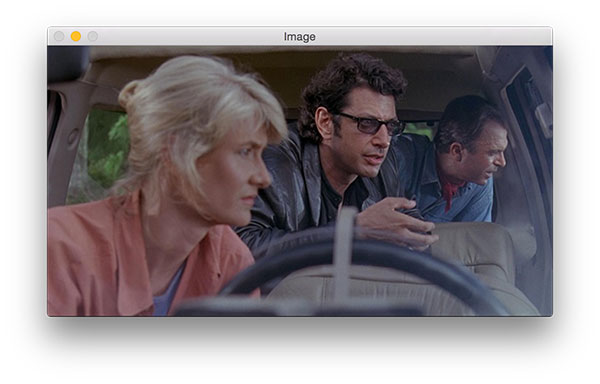

-1

In [12]:
cv2_imshow(image)
cv2.waitKey(0)

In [13]:
(B,G,R)=image[100,50]
print("R={},G={},B={}".format(R,G,B))

R=27,G=18,B=19


In [0]:
roi=image[60:160,320:420]
cv2_imshow(roi)
#cv2.waitkey(0)

In [0]:
resize=cv2.resize(image,(200,200))
cv2_imshow(resize)

In [0]:
r=300.0/w
dim=(300,int(h*r))
resized=cv2.resize(image,dim)
cv2_imshow(resized)

In [0]:
resized=imutils.resize(image,width=400)
cv2_imshow(resized)

In [0]:
center=(w//2,h//2)
M=cv2.getRotationMatrix2D(center,45,0.5)
rotated=cv2.warpAffine(image,M,(w,h))
cv2_imshow(rotated)

In [0]:
rotated=imutils.rotate(image,-45)
cv2_imshow(rotated)

In [0]:
blurred=cv2.GaussianBlur(image,(11,11),0)
cv2_imshow(blurred)

In [14]:
output=image.copy()
cv2.rectangle(output,(320,60),(420,160),(0,0,255),2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

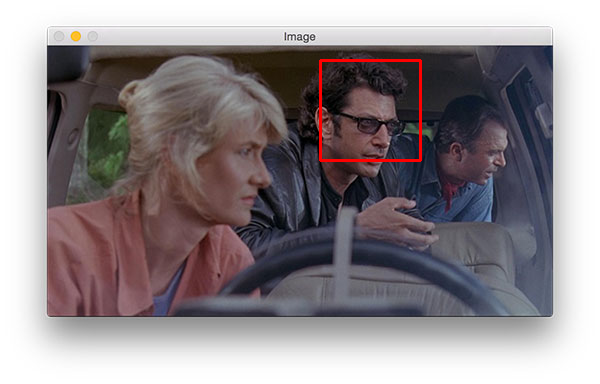

In [16]:
cv2_imshow(output)

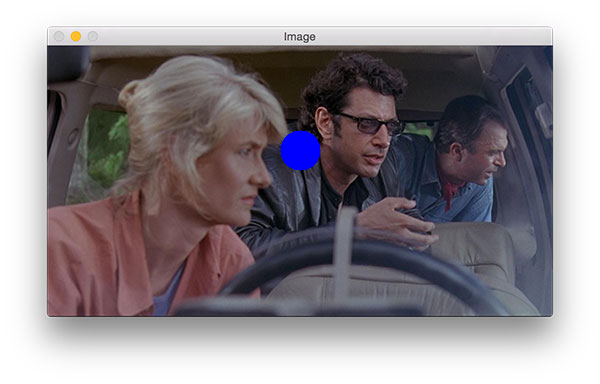

In [17]:
output=image.copy()
cv2.circle(output,(300,150),20,(255,0,0),-1)
cv2_imshow(output)

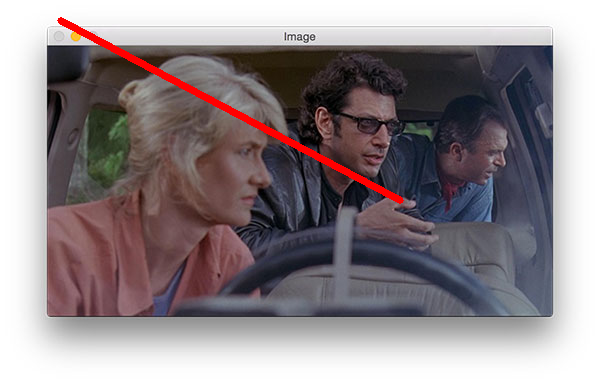

In [18]:
output=image.copy()
cv2.line(output,(60,20),(400,200),(0,0,255),5)
cv2_imshow(output)

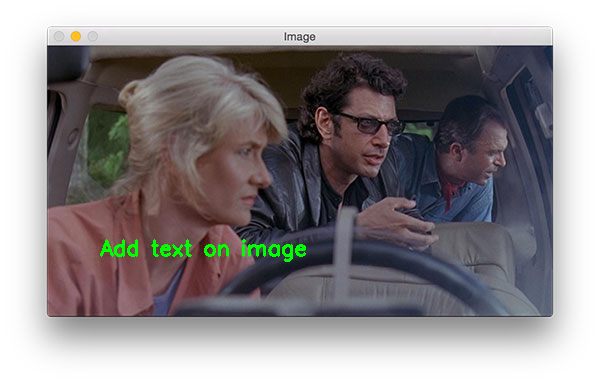

In [20]:
output=image.copy()
cv2.putText(output,"Add text on image",(100,255),
            cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
cv2_imshow(output)

In [21]:
import argparse

ap=argparse.ArgumentParser()
ap.add_argument("-i","--image",required=True,
                help="Path to input Image")

args=vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


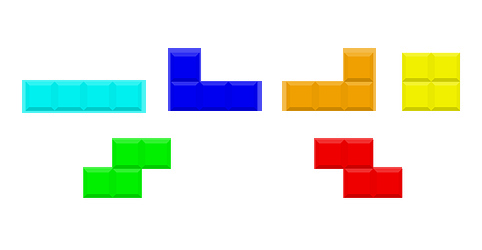

In [22]:
image=cv2.imread("tetris_blocks.png")
cv2_imshow(image)

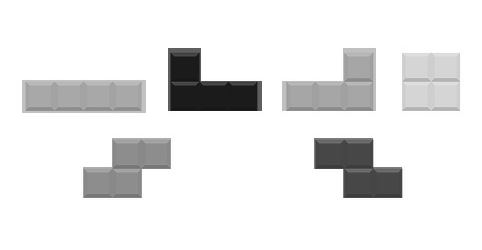

In [23]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

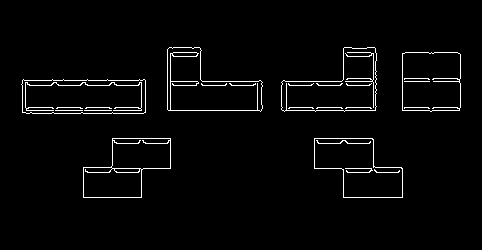

In [24]:
edged=cv2.Canny(gray,30,150)
cv2_imshow(edged)

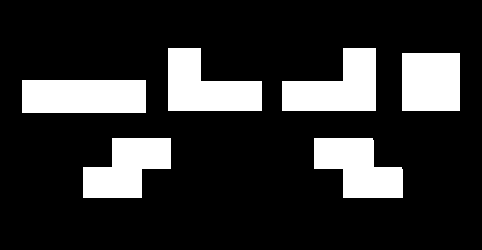

In [27]:
thresh=cv2.threshold(gray,225,255,cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

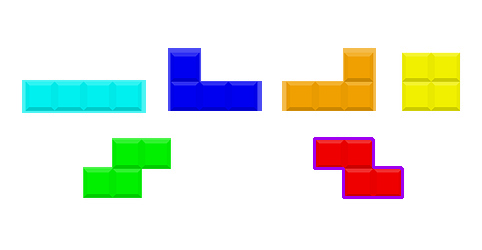

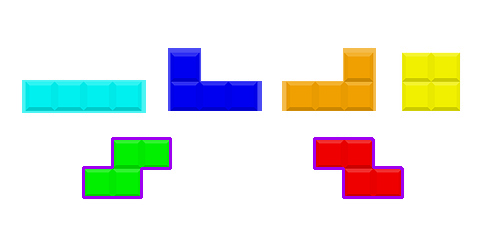

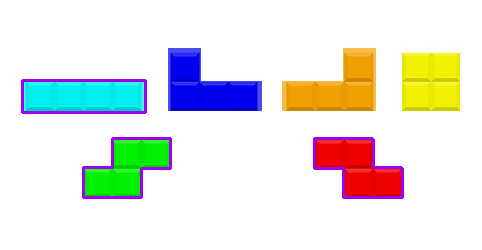

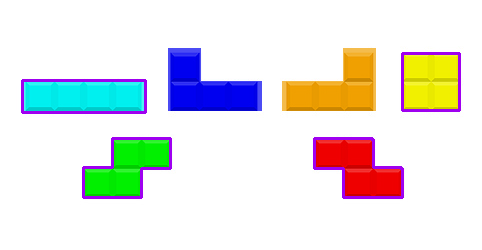

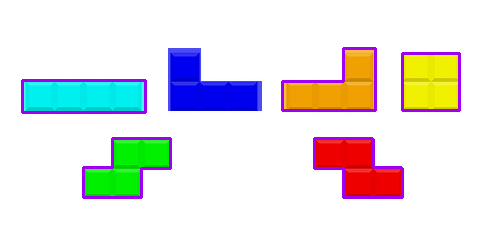

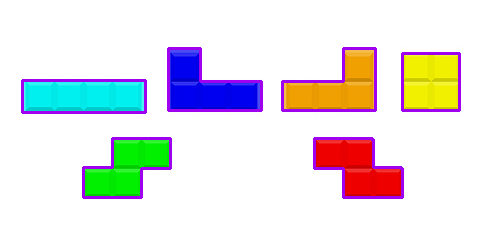

In [33]:
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,
                      cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
outputs=image.copy()

for c in cnts:
  cv2.drawContours(outputs,[c],-1,(240,0,159),2)
  cv2_imshow(outputs)


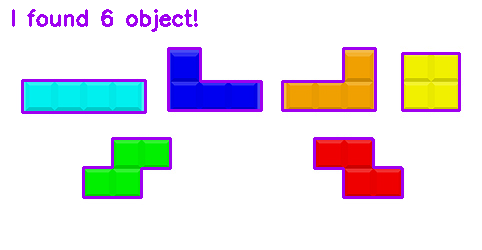

In [34]:
text="I found {} object!".format(len(cnts))
cv2.putText(outputs,text,(10,25),cv2.FONT_HERSHEY_SIMPLEX,0.7,(240,0,159),2)
cv2_imshow(outputs)

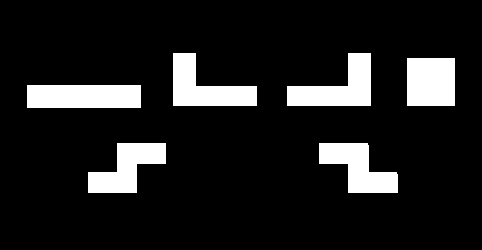

In [35]:
mask=thresh.copy()
mask=cv2.erode(mask,None,iterations=5)
cv2_imshow(mask)

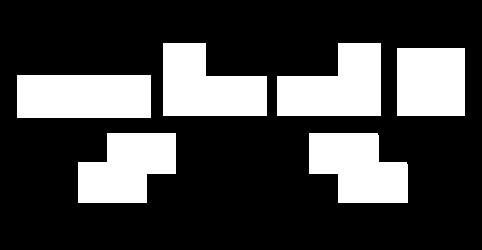

In [39]:
mask=thresh.copy()
mask=cv2.dilate(mask,None,iterations=5)
cv2_imshow(mask)

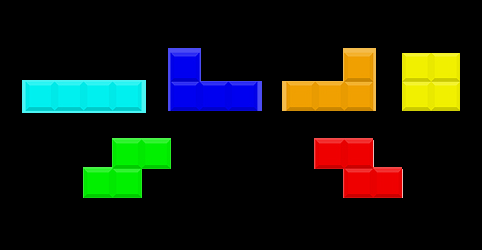

In [41]:
mask=thresh.copy()
outputs=cv2.bitwise_and(image,image,mask=mask)
cv2_imshow(outputs)